<a href="https://colab.research.google.com/github/Shaik-Ayisha/Ayisha_Shaik_Receipt-and-Invoice-Digitizer-_Team_B/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.4 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Build a YOLOv9c model from pretrained weight
model = YOLO('yolov9c.pt')

In [6]:
!wget https://ultralytics.com/images/bus.jpg


--2026-02-18 01:30:24--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 198.202.211.1
Connecting to ultralytics.com (ultralytics.com)|198.202.211.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2026-02-18 01:30:24--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 198.202.211.1, 2620:cb:2000::1
Connecting to www.ultralytics.com (www.ultralytics.com)|198.202.211.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg [following]
--2026-02-18 01:30:25--  https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

In [7]:
results = model('bus.jpg', imgsz=640, save=True)



image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 2396.5ms
Speed: 12.5ms preprocess, 2396.5ms inference, 31.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict


In [8]:
# # Run inference with the YOLOv9c model on the 'bus.jpg' image
# results = model('/content/gettyimages-928538518-640x640.jpg',imgsz=640, save=True)


In [9]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# MIDAS

In [10]:
!pip install timm

In [11]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

In [12]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

/usr/local/lib/python3.12/dist-packages/torch/hub.py:335: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /root/.cache/torch/hub/checkpoints/dpt_large_384.pt


100%|██████████| 1.28G/1.28G [00:27<00:00, 50.7MB/s]


In [13]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
    

In [14]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [16]:
img = cv2.imread('bus.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [17]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

depth_map = prediction.cpu().numpy()

In [18]:
depth_map

array([[     8.4077,      8.4007,      8.3883, ...,      2.7408,      2.6969,      2.6724],
       [     8.3947,       8.391,      8.3844, ...,      2.7444,      2.7105,      2.6915],
       [     8.3727,      8.3745,      8.3771, ...,      2.7499,       2.734,       2.725],
       ...,
       [     34.913,      34.914,      34.917, ...,      35.608,      35.617,      35.622],
       [     34.884,      34.894,      34.912, ...,      35.715,      35.705,        35.7],
       [     34.873,      34.887,      34.913, ...,      35.777,      35.756,      35.746]], dtype=float32)

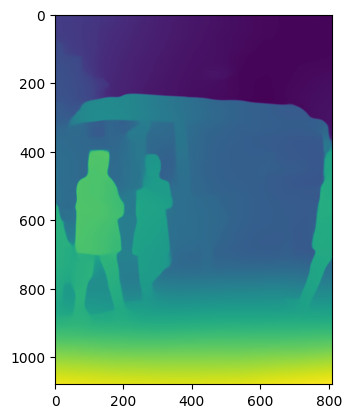

In [19]:
plt.imshow(depth_map)
# plt.show()

In [20]:
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

In [21]:
import numpy as np

def calculate_object_depth(depth_map, x_min, y_min, x_max, y_max, confidence_threshold=0.7):
    # Convert bounding box coordinates to integers
    x_min = int(x_min)
    y_min = int(y_min)
    x_max = int(x_max)
    y_max = int(y_max)

    # Check if confidence is above the threshold
    if confidence >= confidence_threshold:
        # Extract the depth values corresponding to the bounding box coordinates
        depth_values = depth_map[y_min:y_max, x_min:x_max]  # Assuming depth_map is a numpy array

        # Calculate the average depth value within the bounding box
        object_depth = np.mean(depth_values) if depth_values.size > 0 else 0  # Handling case where depth_values is empty

        return object_depth
    else:
        # If confidence is below the threshold, return None
        return 0


In [22]:
# Assuming depth_map is your depth map data and objects_info is obtained from the previous code snippet
depth_threshold = 20  # Define a threshold distance in meters

# Iterate through each detected object
for box, cls, confidence in zip(boxes, classes, confidences):
    # Extract bounding box coordinates
    x_min, y_min, x_max, y_max = box

    # Calculate the depth information for the object (you may need to adjust this based on your depth map format)
    object_depth = calculate_object_depth(depth_map, x_min, y_min, x_max, y_max)

    # Check if the object is too close based on the threshold distance
    if object_depth > depth_threshold:
        # Print a message indicating that the object is too close
        print(f"Object of class {names[cls]} is too close at depth")
    # else:
    #   print(object_depth," ",names[cls])


Object of class person is too close at depth
Object of class person is too close at depth
